In [13]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas  as pd

from pyproj import CRS
from pyproj import Proj
from pyproj import Transformer
import geopandas

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import requests; from urllib.parse import urlparse
import json

import urllib
from matplotlib import font_manager

from matplotlib import rc
plt.rcParams['axes.unicode_minus'] = False
f_path= "C:/Windows/Fonts/malgun.ttf"
font_name= font_manager.FontProperties(fname=f_path).get_name()
rc('font', family =font_name)
plt.rc('font', family='Malgun Gothic')

In [14]:
raw_data_5 = pd.read_csv('./data/KRI-DAC_Jeju_data5.txt', sep=',')
raw_data_5.tail(2)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
273181,273182,273182,202005,제주특별자치도,제주시,중소,제과점,x시,25000,0,2,0,950524.6587,1.500760e+06
273182,273183,273183,202005,제주특별자치도,제주시,영세,서양음식,x시,6000,0,1,0,950674.5989,1.500760e+06


<AxesSubplot:>

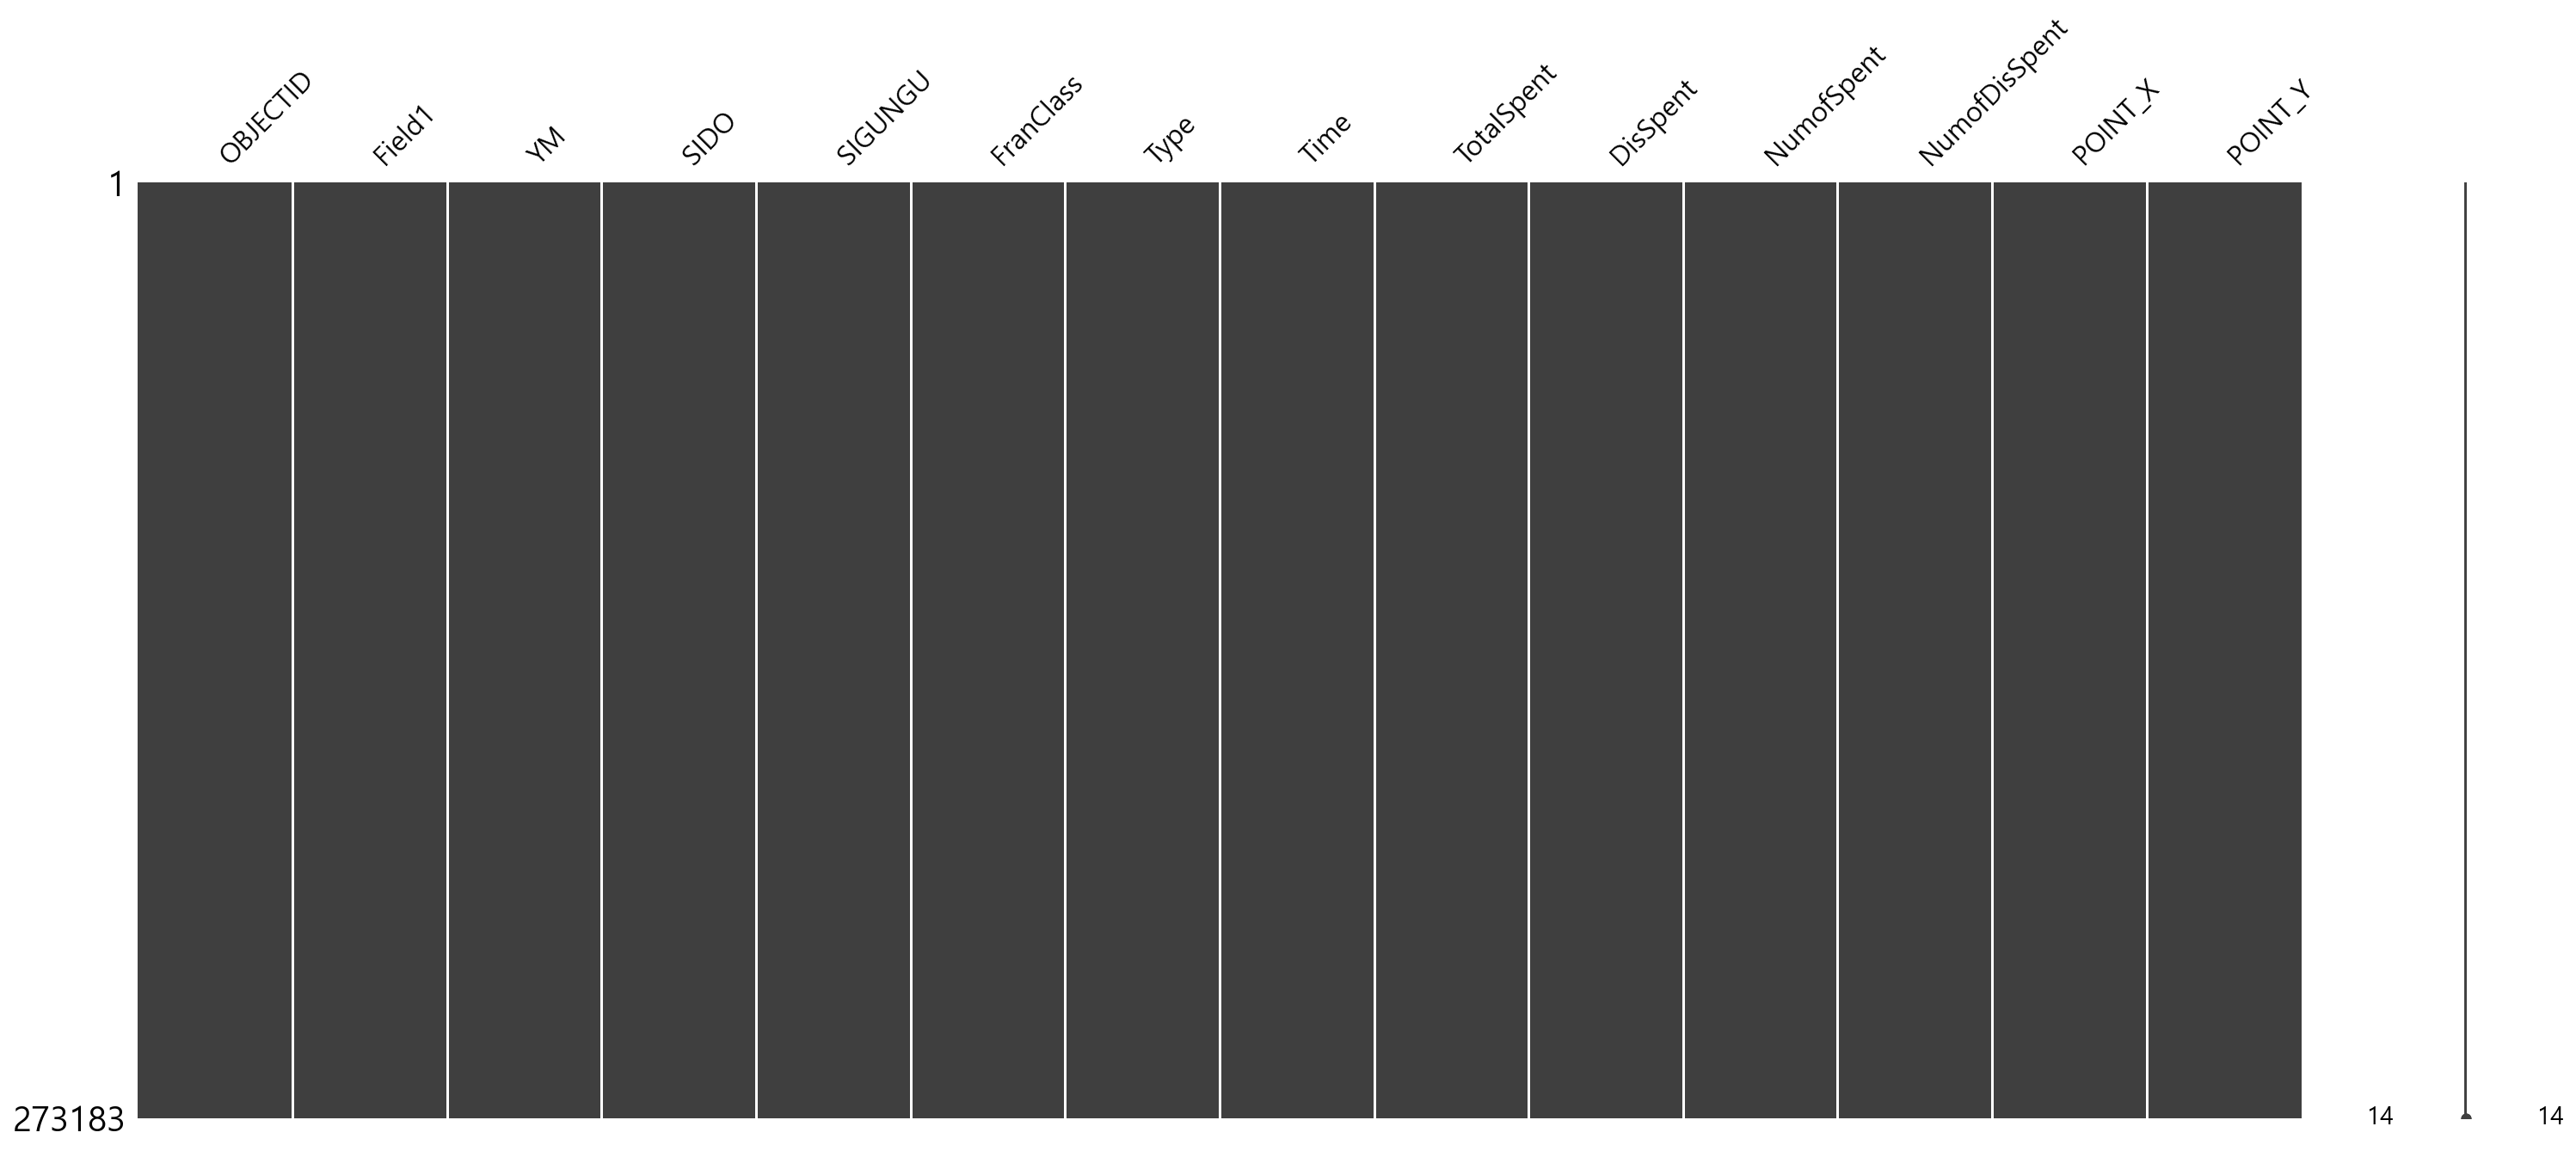

In [15]:
df_5 = raw_data_5.copy()
msno.matrix(df_5)

In [16]:
# X,Y좌표 pyproj 이용해서 위도, 경도로 변경
# UTMK좌표계
from pyproj import Proj, transform
# ITRF좌표계
proj_ITRF = Proj(init='epsg:5179')
# WGS 좌표계 
proj_WGS84 = Proj(init='epsg:4326')


C:\ANACONDA3-1\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\ANACONDA3-1\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\ANACONDA3-1\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: h

In [17]:
df_5['lon'], df_5['lat'] = transform(proj_ITRF, proj_WGS84, df_5['POINT_X'], df_5['POINT_Y'])

<ipython-input-17-32692031e943>:1: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  df_5['lon'], df_5['lat'] = transform(proj_ITRF, proj_WGS84, df_5['POINT_X'], df_5['POINT_Y'])


In [18]:
df_5['lon_lat']='x=' + df_5['lon'].astype('string')+'&y='+df_5['lat'].astype('string')
df_5.head(2)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,126.178894,33.302315,x=126.17889362710162&y=33.30231529076244
1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06,126.178884,33.302766,x=126.17888426813494&y=33.302765922881875


In [11]:
df_5 = pd.read_csv('./data/df_5.csv', sep=',',encoding="euc-kr")
df_5.tail(2)

C:\ANACONDA3-1\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone,classification
273181,273181,273182,273182,202005,제주특별자치도,제주시,중소,제과점,x,25000,0,2,0,950524.6587,1.500760e+06,126.967369,33.497551,심야,식료품
273182,273182,273183,273183,202005,제주특별자치도,제주시,영세,서양음식,x,6000,0,1,0,950674.5989,1.500760e+06,126.968983,33.497564,심야,외식


In [13]:
list = []

for i in range(10000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
list

['한경면',
 '한경면',
 '한경면',
 '한경면',
 '한경면',
 '한경면',
 '한경면',
 '한경면',
 '한경면',
 '대정읍',
 '한경면',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '한림읍',
 '대정읍',
 '한림읍',
 '한림읍',
 '대정읍',
 '한림읍',
 '한림읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '한림읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '한림읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '대정읍',
 '한림읍',
 '대정읍',
 '한림읍',
 '한림읍',
 '대정읍',
 '대정읍',
 '대정읍',


In [14]:
df_5_1 = pd.DataFrame(list, columns = ['dong'])
df_5_1.head(5)

,dong
0,한경면
1,한경면
2,한경면
3,한경면
4,한경면


In [15]:
df_5_1.to_csv('./data/df_5_1.csv',sep=',',encoding='euc-kr')

In [16]:
list = []

for i in range(10000,20000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
list

['일도1동',
 '일도1동',
 '일도1동',
 '건입동',
 '삼도1동',
 '삼도1동',
 '삼도1동',
 '삼도1동',
 '이도2동',
 '이도1동',
 '삼도2동',
 '삼도2동',
 '삼도2동',
 '삼도2동',
 '이도1동',
 '이도1동',
 '일도1동',
 '건입동',
 '건입동',
 '이도2동',
 '이도2동',
 '이도1동',
 '이도1동',
 '일도1동',
 '건입동',
 '아라동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '일도1동',
 '일도1동',
 '일도1동',
 '건입동',
 '건입동',
 '건입동',
 '건입동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '일도1동',
 '일도1동',
 '일도1동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '일도1동',
 '일도1동',
 '건입동',
 '건입동',
 '건입동',
 '건입동',
 '건입동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동',
 '이도1동

In [17]:
df_5_2 = pd.DataFrame(list, columns = ['dong'])
df_5_2.head(5)

,dong
0,일도1동
1,일도1동
2,일도1동
3,건입동
4,삼도1동


In [18]:
df_5_2.to_csv('./data/df_5_2.csv',sep=',',encoding='euc-kr')

In [19]:
list = []

for i in range(20000,30000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
list

['노형동',
 '외도동',
 '노형동',
 '노형동',
 '노형동',
 '외도동',
 '이호동',
 '외도동',
 '중문동',
 '중문동',
 '노형동',
 '노형동',
 '노형동',
 '이호동',
 '이호동',
 '이호동',
 '이호동',
 '이호동',
 '대천동',
 '중문동',
 '노형동',
 '이호동',
 '이호동',
 '중문동',
 '노형동',
 '이호동',
 '이호동',
 '대천동',
 '외도동',
 '이호동',
 '외도동',
 '이호동',
 '외도동',
 '이호동',
 '노형동',
 '노형동',
 '외도동',
 '외도동',
 '이호동',
 '이호동',
 '이호동',
 '외도동',
 '이호동',
 '이호동',
 '이호동',
 '노형동',
 '이호동',
 '노형동',
 '외도동',
 '노형동',
 '노형동',
 '노형동',
 '이호동',
 '이호동',
 '노형동',
 '이호동',
 '이호동',
 '노형동',
 '노형동',
 '이호동',
 '이호동',
 '이호동',
 '이호동',
 '이호동',
 '도두동',
 '도두동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '도두동',
 '도두동',
 '도두동',
 '도두동',
 '도두동',
 '도두동',
 '도두동',
 '대천동',
 '이호동',
 '도두동',
 '도두동',
 '도두동',
 '도두동',
 '노형동',
 '노형동',
 '노형동',
 '이호동',
 '도두동',
 '도두동',
 '도두동',
 '도두동',
 '도두동',
 '노형동',
 '도두동',
 '도두동',
 '도두동',
 '노형동',
 '노형동',
 '노형동',
 '도두동',
 '노형동',
 '이호동',
 '이호동',
 '도두동',
 '노형동',
 '노형동',
 '이호동',
 '도두동',
 '도두동',
 '노형동',
 '도두동',
 '도두동',
 '대천동',
 '대천동',
 '대천동',
 '노형동',
 '노형동',
 '도두동',
 '도두동',
 '대천동',
 '노형동',


In [20]:
df_5_3 = pd.DataFrame(list, columns = ['dong'])
df_5_3.head(5)

,dong
0,노형동
1,외도동
2,노형동
3,노형동
4,노형동


In [21]:
df_5_3.to_csv('./data/df_5_3.csv',sep=',',encoding='euc-kr')

In [22]:
df_5.to_csv('./data/df_5.csv',sep=',',encoding='euc-kr')

In [25]:
list = []

for i in range(30000,40000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

30000 번째 경위도 좌표계에 대한 정보 불러오는 중...
30100 번째 경위도 좌표계에 대한 정보 불러오는 중...
30200 번째 경위도 좌표계에 대한 정보 불러오는 중...
30300 번째 경위도 좌표계에 대한 정보 불러오는 중...
30400 번째 경위도 좌표계에 대한 정보 불러오는 중...
30500 번째 경위도 좌표계에 대한 정보 불러오는 중...
30600 번째 경위도 좌표계에 대한 정보 불러오는 중...
30700 번째 경위도 좌표계에 대한 정보 불러오는 중...
30800 번째 경위도 좌표계에 대한 정보 불러오는 중...
30900 번째 경위도 좌표계에 대한 정보 불러오는 중...
31000 번째 경위도 좌표계에 대한 정보 불러오는 중...
31100 번째 경위도 좌표계에 대한 정보 불러오는 중...
31200 번째 경위도 좌표계에 대한 정보 불러오는 중...
31300 번째 경위도 좌표계에 대한 정보 불러오는 중...
31400 번째 경위도 좌표계에 대한 정보 불러오는 중...
31500 번째 경위도 좌표계에 대한 정보 불러오는 중...
31600 번째 경위도 좌표계에 대한 정보 불러오는 중...
31700 번째 경위도 좌표계에 대한 정보 불러오는 중...
31800 번째 경위도 좌표계에 대한 정보 불러오는 중...
31900 번째 경위도 좌표계에 대한 정보 불러오는 중...
32000 번째 경위도 좌표계에 대한 정보 불러오는 중...
32100 번째 경위도 좌표계에 대한 정보 불러오는 중...
32200 번째 경위도 좌표계에 대한 정보 불러오는 중...
32300 번째 경위도 좌표계에 대한 정보 불러오는 중...
32400 번째 경위도 좌표계에 대한 정보 불러오는 중...
32500 번째 경위도 좌표계에 대한 정보 불러오는 중...
32600 번째 경위도 좌표계에 대한 정보 불러오는 중...
32700 번째 경위도 좌표계에 대한 정보 불러오는 중...
32800 번째 경위도 좌표계에 대한 정보 불러오는 중...
32900 번째 경위도 좌

['성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '구좌읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '구좌읍',
 '구좌읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '성산읍',


In [26]:
df_5_4 = pd.DataFrame(list, columns = ['dong'])
df_5_4.head(5)

,dong
0,성산읍
1,성산읍
2,성산읍
3,성산읍
4,성산읍


In [27]:
df_5_4.to_csv('./data/df_5_4.csv',sep=',',encoding='euc-kr')

In [28]:
list = []

for i in range(40000,50000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%10 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

40000 번째 경위도 좌표계에 대한 정보 불러오는 중...
40010 번째 경위도 좌표계에 대한 정보 불러오는 중...
40020 번째 경위도 좌표계에 대한 정보 불러오는 중...
40030 번째 경위도 좌표계에 대한 정보 불러오는 중...
40040 번째 경위도 좌표계에 대한 정보 불러오는 중...
40050 번째 경위도 좌표계에 대한 정보 불러오는 중...
40060 번째 경위도 좌표계에 대한 정보 불러오는 중...
40070 번째 경위도 좌표계에 대한 정보 불러오는 중...
40080 번째 경위도 좌표계에 대한 정보 불러오는 중...
40090 번째 경위도 좌표계에 대한 정보 불러오는 중...
40100 번째 경위도 좌표계에 대한 정보 불러오는 중...
40110 번째 경위도 좌표계에 대한 정보 불러오는 중...
40120 번째 경위도 좌표계에 대한 정보 불러오는 중...
40130 번째 경위도 좌표계에 대한 정보 불러오는 중...
40140 번째 경위도 좌표계에 대한 정보 불러오는 중...
40150 번째 경위도 좌표계에 대한 정보 불러오는 중...
40160 번째 경위도 좌표계에 대한 정보 불러오는 중...
40170 번째 경위도 좌표계에 대한 정보 불러오는 중...
40180 번째 경위도 좌표계에 대한 정보 불러오는 중...
40190 번째 경위도 좌표계에 대한 정보 불러오는 중...
40200 번째 경위도 좌표계에 대한 정보 불러오는 중...
40210 번째 경위도 좌표계에 대한 정보 불러오는 중...
40220 번째 경위도 좌표계에 대한 정보 불러오는 중...
40230 번째 경위도 좌표계에 대한 정보 불러오는 중...
40240 번째 경위도 좌표계에 대한 정보 불러오는 중...
40250 번째 경위도 좌표계에 대한 정보 불러오는 중...
40260 번째 경위도 좌표계에 대한 정보 불러오는 중...
40270 번째 경위도 좌표계에 대한 정보 불러오는 중...
40280 번째 경위도 좌표계에 대한 정보 불러오는 중...
40290 번째 경위도 좌

42410 번째 경위도 좌표계에 대한 정보 불러오는 중...
42420 번째 경위도 좌표계에 대한 정보 불러오는 중...
42430 번째 경위도 좌표계에 대한 정보 불러오는 중...
42440 번째 경위도 좌표계에 대한 정보 불러오는 중...
42450 번째 경위도 좌표계에 대한 정보 불러오는 중...
42460 번째 경위도 좌표계에 대한 정보 불러오는 중...
42470 번째 경위도 좌표계에 대한 정보 불러오는 중...
42480 번째 경위도 좌표계에 대한 정보 불러오는 중...
42490 번째 경위도 좌표계에 대한 정보 불러오는 중...
42500 번째 경위도 좌표계에 대한 정보 불러오는 중...
42510 번째 경위도 좌표계에 대한 정보 불러오는 중...
42520 번째 경위도 좌표계에 대한 정보 불러오는 중...
42530 번째 경위도 좌표계에 대한 정보 불러오는 중...
42540 번째 경위도 좌표계에 대한 정보 불러오는 중...
42550 번째 경위도 좌표계에 대한 정보 불러오는 중...
42560 번째 경위도 좌표계에 대한 정보 불러오는 중...
42570 번째 경위도 좌표계에 대한 정보 불러오는 중...
42580 번째 경위도 좌표계에 대한 정보 불러오는 중...
42590 번째 경위도 좌표계에 대한 정보 불러오는 중...
42600 번째 경위도 좌표계에 대한 정보 불러오는 중...
42610 번째 경위도 좌표계에 대한 정보 불러오는 중...
42620 번째 경위도 좌표계에 대한 정보 불러오는 중...
42630 번째 경위도 좌표계에 대한 정보 불러오는 중...
42640 번째 경위도 좌표계에 대한 정보 불러오는 중...
42650 번째 경위도 좌표계에 대한 정보 불러오는 중...
42660 번째 경위도 좌표계에 대한 정보 불러오는 중...
42670 번째 경위도 좌표계에 대한 정보 불러오는 중...
42680 번째 경위도 좌표계에 대한 정보 불러오는 중...
42690 번째 경위도 좌표계에 대한 정보 불러오는 중...
42700 번째 경위도 좌

44820 번째 경위도 좌표계에 대한 정보 불러오는 중...
44830 번째 경위도 좌표계에 대한 정보 불러오는 중...
44840 번째 경위도 좌표계에 대한 정보 불러오는 중...
44850 번째 경위도 좌표계에 대한 정보 불러오는 중...
44860 번째 경위도 좌표계에 대한 정보 불러오는 중...
44870 번째 경위도 좌표계에 대한 정보 불러오는 중...
44880 번째 경위도 좌표계에 대한 정보 불러오는 중...
44890 번째 경위도 좌표계에 대한 정보 불러오는 중...
44900 번째 경위도 좌표계에 대한 정보 불러오는 중...
44910 번째 경위도 좌표계에 대한 정보 불러오는 중...
44920 번째 경위도 좌표계에 대한 정보 불러오는 중...
44930 번째 경위도 좌표계에 대한 정보 불러오는 중...
44940 번째 경위도 좌표계에 대한 정보 불러오는 중...
44950 번째 경위도 좌표계에 대한 정보 불러오는 중...
44960 번째 경위도 좌표계에 대한 정보 불러오는 중...
44970 번째 경위도 좌표계에 대한 정보 불러오는 중...
44980 번째 경위도 좌표계에 대한 정보 불러오는 중...
44990 번째 경위도 좌표계에 대한 정보 불러오는 중...
45000 번째 경위도 좌표계에 대한 정보 불러오는 중...
45010 번째 경위도 좌표계에 대한 정보 불러오는 중...
45020 번째 경위도 좌표계에 대한 정보 불러오는 중...
45030 번째 경위도 좌표계에 대한 정보 불러오는 중...
45040 번째 경위도 좌표계에 대한 정보 불러오는 중...
45050 번째 경위도 좌표계에 대한 정보 불러오는 중...
45060 번째 경위도 좌표계에 대한 정보 불러오는 중...
45070 번째 경위도 좌표계에 대한 정보 불러오는 중...
45080 번째 경위도 좌표계에 대한 정보 불러오는 중...
45090 번째 경위도 좌표계에 대한 정보 불러오는 중...
45100 번째 경위도 좌표계에 대한 정보 불러오는 중...
45110 번째 경위도 좌

47230 번째 경위도 좌표계에 대한 정보 불러오는 중...
47240 번째 경위도 좌표계에 대한 정보 불러오는 중...
47250 번째 경위도 좌표계에 대한 정보 불러오는 중...
47260 번째 경위도 좌표계에 대한 정보 불러오는 중...
47270 번째 경위도 좌표계에 대한 정보 불러오는 중...
47280 번째 경위도 좌표계에 대한 정보 불러오는 중...
47290 번째 경위도 좌표계에 대한 정보 불러오는 중...
47300 번째 경위도 좌표계에 대한 정보 불러오는 중...
47310 번째 경위도 좌표계에 대한 정보 불러오는 중...
47320 번째 경위도 좌표계에 대한 정보 불러오는 중...
47330 번째 경위도 좌표계에 대한 정보 불러오는 중...
47340 번째 경위도 좌표계에 대한 정보 불러오는 중...
47350 번째 경위도 좌표계에 대한 정보 불러오는 중...
47360 번째 경위도 좌표계에 대한 정보 불러오는 중...
47370 번째 경위도 좌표계에 대한 정보 불러오는 중...
47380 번째 경위도 좌표계에 대한 정보 불러오는 중...
47390 번째 경위도 좌표계에 대한 정보 불러오는 중...
47400 번째 경위도 좌표계에 대한 정보 불러오는 중...
47410 번째 경위도 좌표계에 대한 정보 불러오는 중...
47420 번째 경위도 좌표계에 대한 정보 불러오는 중...
47430 번째 경위도 좌표계에 대한 정보 불러오는 중...
47440 번째 경위도 좌표계에 대한 정보 불러오는 중...
47450 번째 경위도 좌표계에 대한 정보 불러오는 중...
47460 번째 경위도 좌표계에 대한 정보 불러오는 중...
47470 번째 경위도 좌표계에 대한 정보 불러오는 중...
47480 번째 경위도 좌표계에 대한 정보 불러오는 중...
47490 번째 경위도 좌표계에 대한 정보 불러오는 중...
47500 번째 경위도 좌표계에 대한 정보 불러오는 중...
47510 번째 경위도 좌표계에 대한 정보 불러오는 중...
47520 번째 경위도 좌

49640 번째 경위도 좌표계에 대한 정보 불러오는 중...
49650 번째 경위도 좌표계에 대한 정보 불러오는 중...
49660 번째 경위도 좌표계에 대한 정보 불러오는 중...
49670 번째 경위도 좌표계에 대한 정보 불러오는 중...
49680 번째 경위도 좌표계에 대한 정보 불러오는 중...
49690 번째 경위도 좌표계에 대한 정보 불러오는 중...
49700 번째 경위도 좌표계에 대한 정보 불러오는 중...
49710 번째 경위도 좌표계에 대한 정보 불러오는 중...
49720 번째 경위도 좌표계에 대한 정보 불러오는 중...
49730 번째 경위도 좌표계에 대한 정보 불러오는 중...
49740 번째 경위도 좌표계에 대한 정보 불러오는 중...
49750 번째 경위도 좌표계에 대한 정보 불러오는 중...
49760 번째 경위도 좌표계에 대한 정보 불러오는 중...
49770 번째 경위도 좌표계에 대한 정보 불러오는 중...
49780 번째 경위도 좌표계에 대한 정보 불러오는 중...
49790 번째 경위도 좌표계에 대한 정보 불러오는 중...
49800 번째 경위도 좌표계에 대한 정보 불러오는 중...
49810 번째 경위도 좌표계에 대한 정보 불러오는 중...
49820 번째 경위도 좌표계에 대한 정보 불러오는 중...
49830 번째 경위도 좌표계에 대한 정보 불러오는 중...
49840 번째 경위도 좌표계에 대한 정보 불러오는 중...
49850 번째 경위도 좌표계에 대한 정보 불러오는 중...
49860 번째 경위도 좌표계에 대한 정보 불러오는 중...
49870 번째 경위도 좌표계에 대한 정보 불러오는 중...
49880 번째 경위도 좌표계에 대한 정보 불러오는 중...
49890 번째 경위도 좌표계에 대한 정보 불러오는 중...
49900 번째 경위도 좌표계에 대한 정보 불러오는 중...
49910 번째 경위도 좌표계에 대한 정보 불러오는 중...
49920 번째 경위도 좌표계에 대한 정보 불러오는 중...
49930 번째 경위도 좌

['표선면',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',


In [29]:
df_5_5 = pd.DataFrame(list, columns = ['dong'])
df_5_5.head(5)

,dong
0,표선면
1,구좌읍
2,구좌읍
3,표선면
4,표선면


In [30]:
df_5_5.to_csv('./data/df_5_5.csv',sep=',',encoding='euc-kr')

In [31]:
list = []

for i in range(50000,60000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

50000 번째 경위도 좌표계에 대한 정보 불러오는 중...
50100 번째 경위도 좌표계에 대한 정보 불러오는 중...
50200 번째 경위도 좌표계에 대한 정보 불러오는 중...
50300 번째 경위도 좌표계에 대한 정보 불러오는 중...
50400 번째 경위도 좌표계에 대한 정보 불러오는 중...
50500 번째 경위도 좌표계에 대한 정보 불러오는 중...
50600 번째 경위도 좌표계에 대한 정보 불러오는 중...
50700 번째 경위도 좌표계에 대한 정보 불러오는 중...
50800 번째 경위도 좌표계에 대한 정보 불러오는 중...
50900 번째 경위도 좌표계에 대한 정보 불러오는 중...
51000 번째 경위도 좌표계에 대한 정보 불러오는 중...
51100 번째 경위도 좌표계에 대한 정보 불러오는 중...
51200 번째 경위도 좌표계에 대한 정보 불러오는 중...
51300 번째 경위도 좌표계에 대한 정보 불러오는 중...
51400 번째 경위도 좌표계에 대한 정보 불러오는 중...
51500 번째 경위도 좌표계에 대한 정보 불러오는 중...
51600 번째 경위도 좌표계에 대한 정보 불러오는 중...
51700 번째 경위도 좌표계에 대한 정보 불러오는 중...
51800 번째 경위도 좌표계에 대한 정보 불러오는 중...
51900 번째 경위도 좌표계에 대한 정보 불러오는 중...
52000 번째 경위도 좌표계에 대한 정보 불러오는 중...
52100 번째 경위도 좌표계에 대한 정보 불러오는 중...
52200 번째 경위도 좌표계에 대한 정보 불러오는 중...
52300 번째 경위도 좌표계에 대한 정보 불러오는 중...
52400 번째 경위도 좌표계에 대한 정보 불러오는 중...
52500 번째 경위도 좌표계에 대한 정보 불러오는 중...
52600 번째 경위도 좌표계에 대한 정보 불러오는 중...
52700 번째 경위도 좌표계에 대한 정보 불러오는 중...
52800 번째 경위도 좌표계에 대한 정보 불러오는 중...
52900 번째 경위도 좌

['일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '건입동',
 '건입동',
 '건입동',
 '건입동',
 '천지동',
 '서홍동',
 '서홍동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '이도2동',
 '이도2동',
 '이도2동',
 '이도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '서홍동',
 '서홍동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '아라동',
 '이도2동',
 '이도2동',
 '이도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 '일도2동',
 

In [32]:
df_5_6 = pd.DataFrame(list, columns = ['dong'])
df_5_6.head(5)

,dong
0,일도2동
1,일도2동
2,일도2동
3,일도2동
4,일도2동


In [33]:
df_5_6.to_csv('./data/df_5_6.csv',sep=',',encoding='euc-kr')

In [34]:
list = []

for i in range(60000,70000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

60000 번째 경위도 좌표계에 대한 정보 불러오는 중...
60100 번째 경위도 좌표계에 대한 정보 불러오는 중...
60200 번째 경위도 좌표계에 대한 정보 불러오는 중...
60300 번째 경위도 좌표계에 대한 정보 불러오는 중...
60400 번째 경위도 좌표계에 대한 정보 불러오는 중...
60500 번째 경위도 좌표계에 대한 정보 불러오는 중...
60600 번째 경위도 좌표계에 대한 정보 불러오는 중...
60700 번째 경위도 좌표계에 대한 정보 불러오는 중...
60800 번째 경위도 좌표계에 대한 정보 불러오는 중...
60900 번째 경위도 좌표계에 대한 정보 불러오는 중...
61000 번째 경위도 좌표계에 대한 정보 불러오는 중...
61100 번째 경위도 좌표계에 대한 정보 불러오는 중...
61200 번째 경위도 좌표계에 대한 정보 불러오는 중...
61300 번째 경위도 좌표계에 대한 정보 불러오는 중...
61400 번째 경위도 좌표계에 대한 정보 불러오는 중...
61500 번째 경위도 좌표계에 대한 정보 불러오는 중...
61600 번째 경위도 좌표계에 대한 정보 불러오는 중...
61700 번째 경위도 좌표계에 대한 정보 불러오는 중...
61800 번째 경위도 좌표계에 대한 정보 불러오는 중...
61900 번째 경위도 좌표계에 대한 정보 불러오는 중...
62000 번째 경위도 좌표계에 대한 정보 불러오는 중...
62100 번째 경위도 좌표계에 대한 정보 불러오는 중...
62200 번째 경위도 좌표계에 대한 정보 불러오는 중...
62300 번째 경위도 좌표계에 대한 정보 불러오는 중...
62400 번째 경위도 좌표계에 대한 정보 불러오는 중...
62500 번째 경위도 좌표계에 대한 정보 불러오는 중...
62600 번째 경위도 좌표계에 대한 정보 불러오는 중...
62700 번째 경위도 좌표계에 대한 정보 불러오는 중...
62800 번째 경위도 좌표계에 대한 정보 불러오는 중...
62900 번째 경위도 좌

['노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '연동',
 '연동',
 '연동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '연동',
 '연동',
 '연동',
 '도두동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '연동',
 '연동',
 '연동',
 '연동',
 '연동',
 '도두동',
 '대천동',
 '대천동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노형동',
 '노

In [35]:
df_5_7 = pd.DataFrame(list, columns = ['dong'])
df_5_7.head(5)

,dong
0,노형동
1,노형동
2,노형동
3,노형동
4,노형동


In [36]:
df_5_7.to_csv('./data/df_5_7.csv',sep=',',encoding='euc-kr')

In [37]:
list = []

for i in range(70000,80000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

70000 번째 경위도 좌표계에 대한 정보 불러오는 중...
70100 번째 경위도 좌표계에 대한 정보 불러오는 중...
70200 번째 경위도 좌표계에 대한 정보 불러오는 중...
70300 번째 경위도 좌표계에 대한 정보 불러오는 중...
70400 번째 경위도 좌표계에 대한 정보 불러오는 중...
70500 번째 경위도 좌표계에 대한 정보 불러오는 중...
70600 번째 경위도 좌표계에 대한 정보 불러오는 중...
70700 번째 경위도 좌표계에 대한 정보 불러오는 중...
70800 번째 경위도 좌표계에 대한 정보 불러오는 중...
70900 번째 경위도 좌표계에 대한 정보 불러오는 중...
71000 번째 경위도 좌표계에 대한 정보 불러오는 중...
71100 번째 경위도 좌표계에 대한 정보 불러오는 중...
71200 번째 경위도 좌표계에 대한 정보 불러오는 중...
71300 번째 경위도 좌표계에 대한 정보 불러오는 중...
71400 번째 경위도 좌표계에 대한 정보 불러오는 중...
71500 번째 경위도 좌표계에 대한 정보 불러오는 중...
71600 번째 경위도 좌표계에 대한 정보 불러오는 중...
71700 번째 경위도 좌표계에 대한 정보 불러오는 중...
71800 번째 경위도 좌표계에 대한 정보 불러오는 중...
71900 번째 경위도 좌표계에 대한 정보 불러오는 중...
72000 번째 경위도 좌표계에 대한 정보 불러오는 중...
72100 번째 경위도 좌표계에 대한 정보 불러오는 중...
72200 번째 경위도 좌표계에 대한 정보 불러오는 중...
72300 번째 경위도 좌표계에 대한 정보 불러오는 중...
72400 번째 경위도 좌표계에 대한 정보 불러오는 중...
72500 번째 경위도 좌표계에 대한 정보 불러오는 중...
72600 번째 경위도 좌표계에 대한 정보 불러오는 중...
72700 번째 경위도 좌표계에 대한 정보 불러오는 중...
72800 번째 경위도 좌표계에 대한 정보 불러오는 중...
72900 번째 경위도 좌

['효돈동',
 '봉개동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '조천읍',
 '조천읍',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '조천읍',
 '조천읍',
 '효돈동',
 '효돈동',
 '효돈동',
 '조천읍',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '조천읍',
 '조천읍',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '효돈동',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '남원읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '남원읍',
 '남원읍',
 '조천읍',
 '조천읍',
 '남원읍',
 '조천읍',
 '남원읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '남원읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '남원읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '남원읍',
 '남원읍',
 '남원읍',
 '봉개동',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '남원읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '남원읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '조천읍',
 '남원읍',
 '남원읍',
 '남원읍',
 '남원읍',
 '봉개동',
 '남원읍',
 '남원읍',
 '남원읍',


In [38]:
df_5_8 = pd.DataFrame(list, columns = ['dong'])
df_5_8.head(5)

,dong
0,효돈동
1,봉개동
2,효돈동
3,효돈동
4,효돈동


In [39]:
df_5_8.to_csv('./data/df_5_8.csv',sep=',',encoding='euc-kr')

In [40]:
list = []

for i in range(80000,90000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

80000 번째 경위도 좌표계에 대한 정보 불러오는 중...
80100 번째 경위도 좌표계에 대한 정보 불러오는 중...
80200 번째 경위도 좌표계에 대한 정보 불러오는 중...
80300 번째 경위도 좌표계에 대한 정보 불러오는 중...
80400 번째 경위도 좌표계에 대한 정보 불러오는 중...
80500 번째 경위도 좌표계에 대한 정보 불러오는 중...
80600 번째 경위도 좌표계에 대한 정보 불러오는 중...
80700 번째 경위도 좌표계에 대한 정보 불러오는 중...
80800 번째 경위도 좌표계에 대한 정보 불러오는 중...
80900 번째 경위도 좌표계에 대한 정보 불러오는 중...
81000 번째 경위도 좌표계에 대한 정보 불러오는 중...
81100 번째 경위도 좌표계에 대한 정보 불러오는 중...
81200 번째 경위도 좌표계에 대한 정보 불러오는 중...
81300 번째 경위도 좌표계에 대한 정보 불러오는 중...
81400 번째 경위도 좌표계에 대한 정보 불러오는 중...
81500 번째 경위도 좌표계에 대한 정보 불러오는 중...
81600 번째 경위도 좌표계에 대한 정보 불러오는 중...
81700 번째 경위도 좌표계에 대한 정보 불러오는 중...
81800 번째 경위도 좌표계에 대한 정보 불러오는 중...
81900 번째 경위도 좌표계에 대한 정보 불러오는 중...
82000 번째 경위도 좌표계에 대한 정보 불러오는 중...
82100 번째 경위도 좌표계에 대한 정보 불러오는 중...
82200 번째 경위도 좌표계에 대한 정보 불러오는 중...
82300 번째 경위도 좌표계에 대한 정보 불러오는 중...
82400 번째 경위도 좌표계에 대한 정보 불러오는 중...
82500 번째 경위도 좌표계에 대한 정보 불러오는 중...
82600 번째 경위도 좌표계에 대한 정보 불러오는 중...
82700 번째 경위도 좌표계에 대한 정보 불러오는 중...
82800 번째 경위도 좌표계에 대한 정보 불러오는 중...
82900 번째 경위도 좌

['대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '오라동',
 '오라동',
 '연동',
 '연동',
 '연동',
 '연동',
 '연동',
 '연동',
 '연동',
 '연동',
 '연동',
 '연동',
 '연동',
 '연동',
 '오라동',
 '오라동',
 '오라동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '연동',
 '연동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대륜동',
 '대륜동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '오라동',
 '오라동',
 '연동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '대륜동',
 '대륜동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '대천동',
 '오라동',
 '오라동',


In [41]:
df_5_9 = pd.DataFrame(list, columns = ['dong'])
df_5_9.head(5)

,dong
0,대천동
1,대천동
2,대천동
3,대천동
4,대천동


In [42]:
df_5_9.to_csv('./data/df_5_9.csv',sep=',',encoding='euc-kr')

In [46]:
list = []

for i in range(90000,100000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%1000 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

90000 번째 경위도 좌표계에 대한 정보 불러오는 중...
91000 번째 경위도 좌표계에 대한 정보 불러오는 중...
92000 번째 경위도 좌표계에 대한 정보 불러오는 중...
93000 번째 경위도 좌표계에 대한 정보 불러오는 중...
94000 번째 경위도 좌표계에 대한 정보 불러오는 중...
95000 번째 경위도 좌표계에 대한 정보 불러오는 중...
96000 번째 경위도 좌표계에 대한 정보 불러오는 중...
97000 번째 경위도 좌표계에 대한 정보 불러오는 중...
98000 번째 경위도 좌표계에 대한 정보 불러오는 중...
99000 번째 경위도 좌표계에 대한 정보 불러오는 중...


['구좌읍',
 '구좌읍',
 '표선면',
 '남원읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '남원읍',
 '남원읍',
 '표선면',
 '남원읍',
 '구좌읍',
 '남원읍',
 '남원읍',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '남원읍',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '구좌읍',
 '표선면',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '구좌읍',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '구좌읍',
 '표선면',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',


In [47]:
df_5_10 = pd.DataFrame(list, columns = ['dong'])
df_5_10.head(5)

,dong
0,구좌읍
1,구좌읍
2,표선면
3,남원읍
4,표선면


In [48]:
df_5_10.to_csv('./data/df_5_10.csv',sep=',',encoding='euc-kr')

In [49]:
list = []

for i in range(100000,110000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

100000 번째 경위도 좌표계에 대한 정보 불러오는 중...
100100 번째 경위도 좌표계에 대한 정보 불러오는 중...
100200 번째 경위도 좌표계에 대한 정보 불러오는 중...
100300 번째 경위도 좌표계에 대한 정보 불러오는 중...
100400 번째 경위도 좌표계에 대한 정보 불러오는 중...
100500 번째 경위도 좌표계에 대한 정보 불러오는 중...
100600 번째 경위도 좌표계에 대한 정보 불러오는 중...
100700 번째 경위도 좌표계에 대한 정보 불러오는 중...
100800 번째 경위도 좌표계에 대한 정보 불러오는 중...
100900 번째 경위도 좌표계에 대한 정보 불러오는 중...
101000 번째 경위도 좌표계에 대한 정보 불러오는 중...
101100 번째 경위도 좌표계에 대한 정보 불러오는 중...
101200 번째 경위도 좌표계에 대한 정보 불러오는 중...
101300 번째 경위도 좌표계에 대한 정보 불러오는 중...
101400 번째 경위도 좌표계에 대한 정보 불러오는 중...
101500 번째 경위도 좌표계에 대한 정보 불러오는 중...
101600 번째 경위도 좌표계에 대한 정보 불러오는 중...
101700 번째 경위도 좌표계에 대한 정보 불러오는 중...
101800 번째 경위도 좌표계에 대한 정보 불러오는 중...
101900 번째 경위도 좌표계에 대한 정보 불러오는 중...
102000 번째 경위도 좌표계에 대한 정보 불러오는 중...
102100 번째 경위도 좌표계에 대한 정보 불러오는 중...
102200 번째 경위도 좌표계에 대한 정보 불러오는 중...
102300 번째 경위도 좌표계에 대한 정보 불러오는 중...
102400 번째 경위도 좌표계에 대한 정보 불러오는 중...
102500 번째 경위도 좌표계에 대한 정보 불러오는 중...
102600 번째 경위도 좌표계에 대한 정보 불러오는 중...
102700 번째 경위도 좌표계에 대한 정보 불러오는 중...
102800 번째 경위도 좌표계에 대

['오라동',
 '오라동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '대륜동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '용담2동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '오라동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용담1동',
 '용

In [50]:
df_5_11 = pd.DataFrame(list, columns = ['dong'])
df_5_11.head(5)

,dong
0,오라동
1,오라동
2,용담1동
3,용담1동
4,용담1동


In [51]:
df_5_11.to_csv('./data/df_5_11.csv',sep=',',encoding='euc-kr')

In [52]:
list = []

for i in range(110000,120000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

110000 번째 경위도 좌표계에 대한 정보 불러오는 중...
110100 번째 경위도 좌표계에 대한 정보 불러오는 중...
110200 번째 경위도 좌표계에 대한 정보 불러오는 중...
110300 번째 경위도 좌표계에 대한 정보 불러오는 중...
110400 번째 경위도 좌표계에 대한 정보 불러오는 중...
110500 번째 경위도 좌표계에 대한 정보 불러오는 중...
110600 번째 경위도 좌표계에 대한 정보 불러오는 중...
110700 번째 경위도 좌표계에 대한 정보 불러오는 중...
110800 번째 경위도 좌표계에 대한 정보 불러오는 중...
110900 번째 경위도 좌표계에 대한 정보 불러오는 중...
111000 번째 경위도 좌표계에 대한 정보 불러오는 중...
111100 번째 경위도 좌표계에 대한 정보 불러오는 중...
111200 번째 경위도 좌표계에 대한 정보 불러오는 중...
111300 번째 경위도 좌표계에 대한 정보 불러오는 중...
111400 번째 경위도 좌표계에 대한 정보 불러오는 중...
111500 번째 경위도 좌표계에 대한 정보 불러오는 중...
111600 번째 경위도 좌표계에 대한 정보 불러오는 중...
111700 번째 경위도 좌표계에 대한 정보 불러오는 중...
111800 번째 경위도 좌표계에 대한 정보 불러오는 중...
111900 번째 경위도 좌표계에 대한 정보 불러오는 중...
112000 번째 경위도 좌표계에 대한 정보 불러오는 중...
112100 번째 경위도 좌표계에 대한 정보 불러오는 중...
112200 번째 경위도 좌표계에 대한 정보 불러오는 중...
112300 번째 경위도 좌표계에 대한 정보 불러오는 중...
112400 번째 경위도 좌표계에 대한 정보 불러오는 중...
112500 번째 경위도 좌표계에 대한 정보 불러오는 중...
112600 번째 경위도 좌표계에 대한 정보 불러오는 중...
112700 번째 경위도 좌표계에 대한 정보 불러오는 중...
112800 번째 경위도 좌표계에 대

['성산읍',
 '성산읍',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '성산읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '성산읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '성산읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '성산읍',
 '성산읍',
 '성산읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '성산읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '성산읍',
 '성산읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '성산읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '성산읍',
 '구좌읍',
 '구좌읍',
 '성산읍',
 '성산읍',
 '구좌읍',
 '성산읍',
 '성산읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',
 '성산읍',
 '성산읍',
 '구좌읍',
 '성산읍',
 '구좌읍',
 '구좌읍',
 '성산읍',
 '성산읍',
 '성산읍',
 '구좌읍',
 '구좌읍',
 '구좌읍',


In [53]:
df_5_12 = pd.DataFrame(list, columns = ['dong'])
df_5_12.head(5)

,dong
0,성산읍
1,성산읍
2,표선면
3,표선면
4,표선면


In [54]:
df_5_12.to_csv('./data/df_5_12.csv',sep=',',encoding='euc-kr')

In [3]:
df_5 = pd.read_csv('./data/df_5.csv',sep=',',encoding='euc-kr')
df_5.tail(2)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat
273181,273181,273182,273182,202005,제주특별자치도,제주시,중소,제과점,x시,25000,0,2,0,950524.6587,1.500760e+06,126.967369,33.497551,x=126.96736859949111&y=33.497550664200574
273182,273182,273183,273183,202005,제주특별자치도,제주시,영세,서양음식,x시,6000,0,1,0,950674.5989,1.500760e+06,126.968983,33.497564,x=126.96898269451708&y=33.49756408518746


In [4]:
list = []

for i in range(120000,1300000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

120000 번째 경위도 좌표계에 대한 정보 불러오는 중...
120100 번째 경위도 좌표계에 대한 정보 불러오는 중...
120200 번째 경위도 좌표계에 대한 정보 불러오는 중...
120300 번째 경위도 좌표계에 대한 정보 불러오는 중...
120400 번째 경위도 좌표계에 대한 정보 불러오는 중...
120500 번째 경위도 좌표계에 대한 정보 불러오는 중...
120600 번째 경위도 좌표계에 대한 정보 불러오는 중...
120700 번째 경위도 좌표계에 대한 정보 불러오는 중...
120800 번째 경위도 좌표계에 대한 정보 불러오는 중...
120900 번째 경위도 좌표계에 대한 정보 불러오는 중...
121000 번째 경위도 좌표계에 대한 정보 불러오는 중...
121100 번째 경위도 좌표계에 대한 정보 불러오는 중...
121200 번째 경위도 좌표계에 대한 정보 불러오는 중...
121300 번째 경위도 좌표계에 대한 정보 불러오는 중...
121400 번째 경위도 좌표계에 대한 정보 불러오는 중...
121500 번째 경위도 좌표계에 대한 정보 불러오는 중...
121600 번째 경위도 좌표계에 대한 정보 불러오는 중...
121700 번째 경위도 좌표계에 대한 정보 불러오는 중...
121800 번째 경위도 좌표계에 대한 정보 불러오는 중...
121900 번째 경위도 좌표계에 대한 정보 불러오는 중...
122000 번째 경위도 좌표계에 대한 정보 불러오는 중...
122100 번째 경위도 좌표계에 대한 정보 불러오는 중...
122200 번째 경위도 좌표계에 대한 정보 불러오는 중...
122300 번째 경위도 좌표계에 대한 정보 불러오는 중...
122400 번째 경위도 좌표계에 대한 정보 불러오는 중...
122500 번째 경위도 좌표계에 대한 정보 불러오는 중...
122600 번째 경위도 좌표계에 대한 정보 불러오는 중...
122700 번째 경위도 좌표계에 대한 정보 불러오는 중...
122800 번째 경위도 좌표계에 대

143500 번째 경위도 좌표계에 대한 정보 불러오는 중...
143600 번째 경위도 좌표계에 대한 정보 불러오는 중...
143700 번째 경위도 좌표계에 대한 정보 불러오는 중...
143800 번째 경위도 좌표계에 대한 정보 불러오는 중...
143900 번째 경위도 좌표계에 대한 정보 불러오는 중...
144000 번째 경위도 좌표계에 대한 정보 불러오는 중...
144100 번째 경위도 좌표계에 대한 정보 불러오는 중...
144200 번째 경위도 좌표계에 대한 정보 불러오는 중...
144300 번째 경위도 좌표계에 대한 정보 불러오는 중...
144400 번째 경위도 좌표계에 대한 정보 불러오는 중...
144500 번째 경위도 좌표계에 대한 정보 불러오는 중...
144600 번째 경위도 좌표계에 대한 정보 불러오는 중...
144700 번째 경위도 좌표계에 대한 정보 불러오는 중...
144800 번째 경위도 좌표계에 대한 정보 불러오는 중...
144900 번째 경위도 좌표계에 대한 정보 불러오는 중...
145000 번째 경위도 좌표계에 대한 정보 불러오는 중...
145100 번째 경위도 좌표계에 대한 정보 불러오는 중...
145200 번째 경위도 좌표계에 대한 정보 불러오는 중...
145300 번째 경위도 좌표계에 대한 정보 불러오는 중...
145400 번째 경위도 좌표계에 대한 정보 불러오는 중...
145500 번째 경위도 좌표계에 대한 정보 불러오는 중...
145600 번째 경위도 좌표계에 대한 정보 불러오는 중...
145700 번째 경위도 좌표계에 대한 정보 불러오는 중...
145800 번째 경위도 좌표계에 대한 정보 불러오는 중...
145900 번째 경위도 좌표계에 대한 정보 불러오는 중...
146000 번째 경위도 좌표계에 대한 정보 불러오는 중...
146100 번째 경위도 좌표계에 대한 정보 불러오는 중...
146200 번째 경위도 좌표계에 대한 정보 불러오는 중...
146300 번째 경위도 좌표계에 대

167000 번째 경위도 좌표계에 대한 정보 불러오는 중...
167100 번째 경위도 좌표계에 대한 정보 불러오는 중...
167200 번째 경위도 좌표계에 대한 정보 불러오는 중...
167300 번째 경위도 좌표계에 대한 정보 불러오는 중...
167400 번째 경위도 좌표계에 대한 정보 불러오는 중...
167500 번째 경위도 좌표계에 대한 정보 불러오는 중...
167600 번째 경위도 좌표계에 대한 정보 불러오는 중...
167700 번째 경위도 좌표계에 대한 정보 불러오는 중...
167800 번째 경위도 좌표계에 대한 정보 불러오는 중...
167900 번째 경위도 좌표계에 대한 정보 불러오는 중...
168000 번째 경위도 좌표계에 대한 정보 불러오는 중...
168100 번째 경위도 좌표계에 대한 정보 불러오는 중...
168200 번째 경위도 좌표계에 대한 정보 불러오는 중...
168300 번째 경위도 좌표계에 대한 정보 불러오는 중...
168400 번째 경위도 좌표계에 대한 정보 불러오는 중...
168500 번째 경위도 좌표계에 대한 정보 불러오는 중...
168600 번째 경위도 좌표계에 대한 정보 불러오는 중...
168700 번째 경위도 좌표계에 대한 정보 불러오는 중...
168800 번째 경위도 좌표계에 대한 정보 불러오는 중...
168900 번째 경위도 좌표계에 대한 정보 불러오는 중...
169000 번째 경위도 좌표계에 대한 정보 불러오는 중...
169100 번째 경위도 좌표계에 대한 정보 불러오는 중...
169200 번째 경위도 좌표계에 대한 정보 불러오는 중...
169300 번째 경위도 좌표계에 대한 정보 불러오는 중...
169400 번째 경위도 좌표계에 대한 정보 불러오는 중...
169500 번째 경위도 좌표계에 대한 정보 불러오는 중...
169600 번째 경위도 좌표계에 대한 정보 불러오는 중...
169700 번째 경위도 좌표계에 대한 정보 불러오는 중...
169800 번째 경위도 좌표계에 대

190500 번째 경위도 좌표계에 대한 정보 불러오는 중...
190600 번째 경위도 좌표계에 대한 정보 불러오는 중...
190700 번째 경위도 좌표계에 대한 정보 불러오는 중...
190800 번째 경위도 좌표계에 대한 정보 불러오는 중...
190900 번째 경위도 좌표계에 대한 정보 불러오는 중...
191000 번째 경위도 좌표계에 대한 정보 불러오는 중...
191100 번째 경위도 좌표계에 대한 정보 불러오는 중...
191200 번째 경위도 좌표계에 대한 정보 불러오는 중...
191300 번째 경위도 좌표계에 대한 정보 불러오는 중...
191400 번째 경위도 좌표계에 대한 정보 불러오는 중...
191500 번째 경위도 좌표계에 대한 정보 불러오는 중...
191600 번째 경위도 좌표계에 대한 정보 불러오는 중...
191700 번째 경위도 좌표계에 대한 정보 불러오는 중...
191800 번째 경위도 좌표계에 대한 정보 불러오는 중...
191900 번째 경위도 좌표계에 대한 정보 불러오는 중...
192000 번째 경위도 좌표계에 대한 정보 불러오는 중...
192100 번째 경위도 좌표계에 대한 정보 불러오는 중...
192200 번째 경위도 좌표계에 대한 정보 불러오는 중...
192300 번째 경위도 좌표계에 대한 정보 불러오는 중...
192400 번째 경위도 좌표계에 대한 정보 불러오는 중...
192500 번째 경위도 좌표계에 대한 정보 불러오는 중...
192600 번째 경위도 좌표계에 대한 정보 불러오는 중...
192700 번째 경위도 좌표계에 대한 정보 불러오는 중...
192800 번째 경위도 좌표계에 대한 정보 불러오는 중...
192900 번째 경위도 좌표계에 대한 정보 불러오는 중...
193000 번째 경위도 좌표계에 대한 정보 불러오는 중...
193100 번째 경위도 좌표계에 대한 정보 불러오는 중...
193200 번째 경위도 좌표계에 대한 정보 불러오는 중...
193300 번째 경위도 좌표계에 대

KeyboardInterrupt: 

In [5]:
df_5_13 = pd.DataFrame(list, columns = ['dong'])
df_5_13.head(5)

,dong
0,오라동
1,오라동
2,오라동
3,오라동
4,오라동


In [6]:
df_5_13.to_csv('./data/df_5_13.csv',sep=',',encoding='euc-kr')

In [ ]:
# 여기 오류 발생 확인한번 해보기!!!!!!

In [7]:
list = []

for i in range(208509,220001):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

208600 번째 경위도 좌표계에 대한 정보 불러오는 중...
208700 번째 경위도 좌표계에 대한 정보 불러오는 중...
208800 번째 경위도 좌표계에 대한 정보 불러오는 중...
208900 번째 경위도 좌표계에 대한 정보 불러오는 중...
209000 번째 경위도 좌표계에 대한 정보 불러오는 중...
209100 번째 경위도 좌표계에 대한 정보 불러오는 중...
209200 번째 경위도 좌표계에 대한 정보 불러오는 중...
209300 번째 경위도 좌표계에 대한 정보 불러오는 중...
209400 번째 경위도 좌표계에 대한 정보 불러오는 중...
209500 번째 경위도 좌표계에 대한 정보 불러오는 중...
209600 번째 경위도 좌표계에 대한 정보 불러오는 중...
209700 번째 경위도 좌표계에 대한 정보 불러오는 중...
209800 번째 경위도 좌표계에 대한 정보 불러오는 중...
209900 번째 경위도 좌표계에 대한 정보 불러오는 중...
210000 번째 경위도 좌표계에 대한 정보 불러오는 중...
210100 번째 경위도 좌표계에 대한 정보 불러오는 중...
210200 번째 경위도 좌표계에 대한 정보 불러오는 중...
210300 번째 경위도 좌표계에 대한 정보 불러오는 중...
210400 번째 경위도 좌표계에 대한 정보 불러오는 중...
210500 번째 경위도 좌표계에 대한 정보 불러오는 중...
210600 번째 경위도 좌표계에 대한 정보 불러오는 중...
210700 번째 경위도 좌표계에 대한 정보 불러오는 중...
210800 번째 경위도 좌표계에 대한 정보 불러오는 중...
210900 번째 경위도 좌표계에 대한 정보 불러오는 중...
211000 번째 경위도 좌표계에 대한 정보 불러오는 중...
211100 번째 경위도 좌표계에 대한 정보 불러오는 중...
211200 번째 경위도 좌표계에 대한 정보 불러오는 중...
211300 번째 경위도 좌표계에 대한 정보 불러오는 중...
211400 번째 경위도 좌표계에 대

['구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '구좌읍',
 '구좌읍',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',
 '표선면',


In [8]:
df_5_14 = pd.DataFrame(list, columns = ['dong'])
df_5_14.head(5)

,dong
0,구좌읍
1,구좌읍
2,표선면
3,표선면
4,표선면


In [9]:
df_5_14.to_csv('./data/df_5_14.csv',sep=',',encoding='euc-kr')

In [10]:
len(df_5)

273183

In [20]:
list = []

for i in range(220001,220003):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

['이도2동', '이도2동']

In [ ]:
#21.02.17

In [21]:
list = []

for i in range(220001,273184):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

220100 번째 경위도 좌표계에 대한 정보 불러오는 중...
220200 번째 경위도 좌표계에 대한 정보 불러오는 중...
220300 번째 경위도 좌표계에 대한 정보 불러오는 중...
220400 번째 경위도 좌표계에 대한 정보 불러오는 중...
220500 번째 경위도 좌표계에 대한 정보 불러오는 중...
220600 번째 경위도 좌표계에 대한 정보 불러오는 중...
220700 번째 경위도 좌표계에 대한 정보 불러오는 중...
220800 번째 경위도 좌표계에 대한 정보 불러오는 중...
220900 번째 경위도 좌표계에 대한 정보 불러오는 중...
221000 번째 경위도 좌표계에 대한 정보 불러오는 중...
221100 번째 경위도 좌표계에 대한 정보 불러오는 중...
221200 번째 경위도 좌표계에 대한 정보 불러오는 중...
221300 번째 경위도 좌표계에 대한 정보 불러오는 중...
221400 번째 경위도 좌표계에 대한 정보 불러오는 중...
221500 번째 경위도 좌표계에 대한 정보 불러오는 중...
221600 번째 경위도 좌표계에 대한 정보 불러오는 중...
221700 번째 경위도 좌표계에 대한 정보 불러오는 중...
221800 번째 경위도 좌표계에 대한 정보 불러오는 중...
221900 번째 경위도 좌표계에 대한 정보 불러오는 중...
222000 번째 경위도 좌표계에 대한 정보 불러오는 중...
222100 번째 경위도 좌표계에 대한 정보 불러오는 중...
222200 번째 경위도 좌표계에 대한 정보 불러오는 중...
222300 번째 경위도 좌표계에 대한 정보 불러오는 중...
222400 번째 경위도 좌표계에 대한 정보 불러오는 중...
222500 번째 경위도 좌표계에 대한 정보 불러오는 중...
222600 번째 경위도 좌표계에 대한 정보 불러오는 중...
222700 번째 경위도 좌표계에 대한 정보 불러오는 중...
222800 번째 경위도 좌표계에 대한 정보 불러오는 중...
222900 번째 경위도 좌표계에 대

243600 번째 경위도 좌표계에 대한 정보 불러오는 중...
243700 번째 경위도 좌표계에 대한 정보 불러오는 중...
243800 번째 경위도 좌표계에 대한 정보 불러오는 중...
243900 번째 경위도 좌표계에 대한 정보 불러오는 중...
244000 번째 경위도 좌표계에 대한 정보 불러오는 중...
244100 번째 경위도 좌표계에 대한 정보 불러오는 중...
244200 번째 경위도 좌표계에 대한 정보 불러오는 중...
244300 번째 경위도 좌표계에 대한 정보 불러오는 중...
244400 번째 경위도 좌표계에 대한 정보 불러오는 중...
244500 번째 경위도 좌표계에 대한 정보 불러오는 중...
244600 번째 경위도 좌표계에 대한 정보 불러오는 중...
244700 번째 경위도 좌표계에 대한 정보 불러오는 중...
244800 번째 경위도 좌표계에 대한 정보 불러오는 중...
244900 번째 경위도 좌표계에 대한 정보 불러오는 중...
245000 번째 경위도 좌표계에 대한 정보 불러오는 중...
245100 번째 경위도 좌표계에 대한 정보 불러오는 중...
245200 번째 경위도 좌표계에 대한 정보 불러오는 중...
245300 번째 경위도 좌표계에 대한 정보 불러오는 중...
245400 번째 경위도 좌표계에 대한 정보 불러오는 중...
245500 번째 경위도 좌표계에 대한 정보 불러오는 중...
245600 번째 경위도 좌표계에 대한 정보 불러오는 중...
245700 번째 경위도 좌표계에 대한 정보 불러오는 중...
245800 번째 경위도 좌표계에 대한 정보 불러오는 중...
245900 번째 경위도 좌표계에 대한 정보 불러오는 중...
246000 번째 경위도 좌표계에 대한 정보 불러오는 중...
246100 번째 경위도 좌표계에 대한 정보 불러오는 중...
246200 번째 경위도 좌표계에 대한 정보 불러오는 중...
246300 번째 경위도 좌표계에 대한 정보 불러오는 중...
246400 번째 경위도 좌표계에 대

267100 번째 경위도 좌표계에 대한 정보 불러오는 중...
267200 번째 경위도 좌표계에 대한 정보 불러오는 중...
267300 번째 경위도 좌표계에 대한 정보 불러오는 중...
267400 번째 경위도 좌표계에 대한 정보 불러오는 중...
267500 번째 경위도 좌표계에 대한 정보 불러오는 중...
267600 번째 경위도 좌표계에 대한 정보 불러오는 중...
267700 번째 경위도 좌표계에 대한 정보 불러오는 중...
267800 번째 경위도 좌표계에 대한 정보 불러오는 중...
267900 번째 경위도 좌표계에 대한 정보 불러오는 중...
268000 번째 경위도 좌표계에 대한 정보 불러오는 중...
268100 번째 경위도 좌표계에 대한 정보 불러오는 중...
268200 번째 경위도 좌표계에 대한 정보 불러오는 중...
268300 번째 경위도 좌표계에 대한 정보 불러오는 중...
268400 번째 경위도 좌표계에 대한 정보 불러오는 중...
268500 번째 경위도 좌표계에 대한 정보 불러오는 중...
268600 번째 경위도 좌표계에 대한 정보 불러오는 중...
268700 번째 경위도 좌표계에 대한 정보 불러오는 중...
268800 번째 경위도 좌표계에 대한 정보 불러오는 중...
268900 번째 경위도 좌표계에 대한 정보 불러오는 중...
269000 번째 경위도 좌표계에 대한 정보 불러오는 중...
269100 번째 경위도 좌표계에 대한 정보 불러오는 중...
269200 번째 경위도 좌표계에 대한 정보 불러오는 중...
269300 번째 경위도 좌표계에 대한 정보 불러오는 중...
269400 번째 경위도 좌표계에 대한 정보 불러오는 중...
269500 번째 경위도 좌표계에 대한 정보 불러오는 중...
269600 번째 경위도 좌표계에 대한 정보 불러오는 중...
269700 번째 경위도 좌표계에 대한 정보 불러오는 중...
269800 번째 경위도 좌표계에 대한 정보 불러오는 중...
269900 번째 경위도 좌표계에 대

KeyError: 273183

In [22]:
df_5_15 = pd.DataFrame(list, columns = ['dong'])
df_5_15.head(5)

,dong
0,이도2동
1,이도2동
2,이도2동
3,이도2동
4,이도2동


In [23]:
df_5_15.to_csv('./data/df_5_15.csv',sep=',',encoding='euc-kr')

In [ ]:
# df_6 시작!!!
df_6 = pd.read_csv('./data/df_6.csv',sep=',',encoding='euc-kr')
df_6.tail(2)

In [ ]:
list = []

for i in range(280000,300000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

In [ ]:
df_5_16 = pd.DataFrame(list, columns = ['dong'])
df_5_16.head(5)

In [ ]:
df_5_16.to_csv('./data/df_5_16.csv',sep=',',encoding='euc-kr')

In [ ]:
list = []

for i in range(160000,170000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

In [ ]:
df_5_17 = pd.DataFrame(list, columns = ['dong'])
df_5_17.head(5)

In [ ]:
df_5_17.to_csv('./data/df_5_17.csv',sep=',',encoding='euc-kr')

In [ ]:
list = []

for i in range(170000,180000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

In [ ]:
df_5_18 = pd.DataFrame(list, columns = ['dong'])
df_5_18.head(5)

In [ ]:
df_5_18.to_csv('./data/df_5_18.csv',sep=',',encoding='euc-kr')

In [ ]:
list = []

for i in range(180000,190000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

In [ ]:
df_5_19 = pd.DataFrame(list, columns = ['dong'])
df_5_19.head(5)

In [ ]:
df_5_19.to_csv('./data/df_5_17.csv',sep=',',encoding='euc-kr')

In [ ]:
list = []

for i in range(190000,200000):
    adress = df_5['lon_lat'][i]
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?'+ adress
    result = requests.get(urlparse(url).geturl(),headers = {"Authorization": "KakaoAK 6ea2b3f06c6139f10d6144767432f1fa"})
    json_obj = result.json()
    for document in json_obj['documents']:
        val = document['region_3depth_name']
        if document['region_type'] == "H":
            list.append(val)
    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))
list

In [ ]:
df_5_20 = pd.DataFrame(list, columns = ['dong'])
df_5_20.head(5)

In [ ]:
df_5_20.to_csv('./data/df_5_17.csv',sep=',',encoding='euc-kr')